# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import Counter

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [3]:
dice = pd.DataFrame(np.random.randint(1,7,10), columns = ['Dice'])
dice ['Roll Nb.'] = ['Roll ' + str(i) for i in range(1,11,1)]
dice

,Dice,Roll Nb.
0,1,Roll 1
1,6,Roll 2
2,3,Roll 3
3,2,Roll 4
4,5,Roll 5
5,5,Roll 6
6,5,Roll 7
7,6,Roll 8
8,1,Roll 9
9,5,Roll 10


#### 2.- Plot the results sorted by value.

,Dice,Roll Nb.
0,1,Roll 1
8,1,Roll 9
3,2,Roll 4
2,3,Roll 3
4,5,Roll 5
5,5,Roll 6
6,5,Roll 7
9,5,Roll 10
1,6,Roll 2
7,6,Roll 8


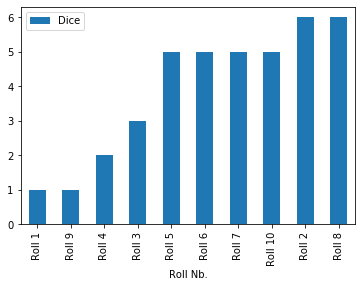

In [4]:
dice.sort_values(by = 'Dice').plot.bar(x = 'Roll Nb.', y = 'Dice')
dice.sort_values(by = 'Dice')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

(1, 6)

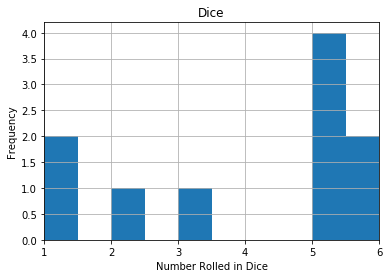

In [5]:
ax = dice.hist()
plt.xlabel('Number Rolled in Dice')
plt.ylabel('Frequency')
plt.xlim(1,6)

In [6]:
"""
Although the X axis is screwed up the frequency dist graph is the sum of the occurences at the same level in the
previous one. There is 1 bar at 2, 2 at 3, 5 at 4 and 1 at 5 and 6.
"""

'\nAlthough the X axis is screwed up the frequency dist graph is the sum of the occurences at the same level in the\nprevious one. There is 1 bar at 2, 2 at 3, 5 at 4 and 1 at 5 and 6.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
def func_mean(col):
    return col.sum()/len(col)

func_mean(dice['Dice'])

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
def freq_dist_mean(col):
    fd = Counter(list(col))
    return sum([k*v for k,v in fd.items()]) / len(col)

freq_dist_mean(dice['Dice'])

3.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
def man_median(col):
    scol = sorted(list(col))
    if len(col) % 2:
        return scol[len(col)//2]
    else:
        return (scol[len(col)//2 -1] + scol[len(col)//2])/2

man_median(dice['Dice'])

5.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
def man_quartile(col):
    scol = sorted(list(col))
    lcol = scol[:len(col)//2]
    
    if len(col) % 2:
        rcol = scol[len(col)//2+1:]
    else:
        rcol = scol[len(col)//2:]        
    
    Q1 = man_median(lcol)
    Q2 = man_median(col)
    Q3 = man_median(rcol)
    Q4 = scol[-1]

    return Q1, Q2, Q3, Q4
    
man_quartile(dice['Dice'])
        

(2, 5.0, 5, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

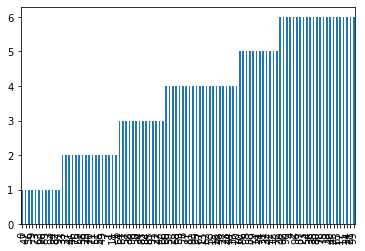

In [11]:
dice_100 = pd.read_csv('../data/roll_the_dice_hundred.csv', index_col = 0)
dice_100.sort_values(by='value')['value'].plot.bar()

In [12]:
"""
We see a stair pattern with each step being the number rolled in the dice and the width of each step the number 
of times that value appeared as a result.
"""

'\nWe see a stair pattern with each step being the number rolled in the dice and the width of each step the number \nof times that value appeared as a result.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [13]:
func_mean(dice_100.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [14]:
fd = Counter(list(dice_100.value))
fd

Counter({1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14})

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

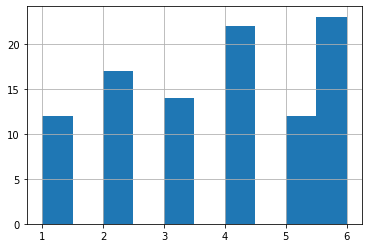

In [15]:
dice_100.value.hist()

In [16]:
"""
The mean is the (each value in the histogram x nb of occurences for that value)/total nb of occurences:

(1x12 + 2x17 + 3x14 +  + 4x22 + 5x12 + 6x23) / (12+17+14+22+12+23)
"""

'\nThe mean is the (each value in the histogram x nb of occurences for that value)/total nb of occurences:\n\n(1x12 + 2x17 + 3x14 +  + 4x22 + 5x12 + 6x23) / (12+17+14+22+12+23)\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [17]:
# your code here

In [18]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11537bad0>]],
      dtype=object)

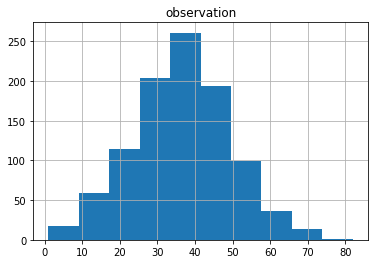

In [19]:
pop1 = pd.read_csv('../data/ages_population.csv')
pop1.hist(bins=10)

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [20]:
print(pop1.mean())
print(pop1.std())

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [21]:
"""
I guesses the mean at ~35 and stdev ~15. I think they are close enough to the values obtained. My guess came from
aprox. this by a normal dist. and knowing that 68% of values fall within 2 std of the mean. Using this
and a visual quick isnpection of the graph gave these aprrox. values
"""

'\nI guesses the mean at ~35 and stdev ~15. I think they are close enough to the values obtained. My guess came from\naprox. this by a normal dist. and knowing that 68% of values fall within 2 std of the mean. Using this\nand a visual quick isnpection of the graph gave these aprrox. values\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1154c40d0>]],
      dtype=object)

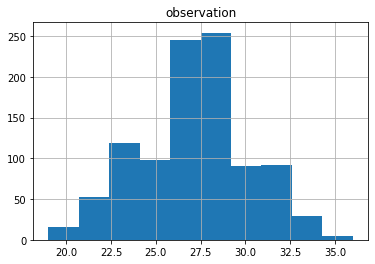

In [22]:
pop2 = pd.read_csv('../data/ages_population2.csv')
pop2.hist(bins=10)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [23]:
"""
The mean is lower and the stdev is much lower (values deay much quicker when going further from the mean)
"""

'\nThe mean is lower and the stdev is much lower (values deay much quicker when going further from the mean)\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [24]:
print(pop2.mean())
print(pop2.std())

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [25]:
"""
The mean is lower and the stdev is much lower (values deay much quicker when going further from the mean)
"""

'\nThe mean is lower and the stdev is much lower (values deay much quicker when going further from the mean)\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114626c10>]],
      dtype=object)

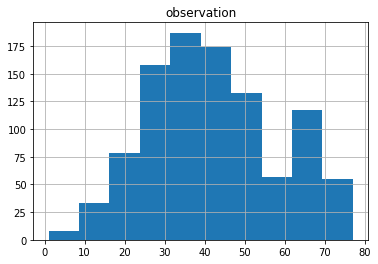

In [26]:
pop3 = pd.read_csv('../data/ages_population3.csv')
pop3.hist(bins=10)

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [27]:
print(pop3.mean())
print(pop3.std())

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [28]:
"""
Higher mean (this neigh. has older people in general). Higher stdev, 
meaning values are more spread out (range of ages is more distributed)
Also the dist is assymetrical with higher concentrations of ages around 65 yrs of age
"""

'\nHigher mean (this neigh. has older people in general). Higher stdev, \nmeaning values are more spread out (range of ages is more distributed)\nAlso the dist is assymetrical with higher concentrations of ages around 65 yrs of age\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [29]:
print(pop3.quantile(0.25))
print(pop3.quantile(0.5))
print(pop3.quantile(0.75))
print(pop3.quantile(1))

observation    30.0
Name: 0.25, dtype: float64
observation    40.0
Name: 0.5, dtype: float64
observation    53.0
Name: 0.75, dtype: float64
observation    77.0
Name: 1, dtype: float64


In [30]:
"""
The 75% quantile is 13 yrs above the median whilst the 25% is 20 yrs below, meaning
the distribution pattern is assymetrical. 
Median is 40.0 and Mean is 41.9 so 1.9 yrs difference.
"""

'\nThe 75% quantile is 13 yrs above the median whilst the 25% is 20 yrs below, meaning\nthe distribution pattern is assymetrical. \nMedian is 40.0 and Mean is 41.9 so 1.9 yrs difference.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [31]:
print(pop3.quantile(0.9))
print(pop3.quantile(0.1))

observation    67.0
Name: 0.9, dtype: float64
observation    22.0
Name: 0.1, dtype: float64


In [32]:
"""
Going further in the %iles at 90% we are at 67 yrs so 27 yrs away from median while at 10% we are at 22 only 18
yrs away from the median, reinforcing the assymetric nature of the distribution.
"""

'\nGoing further in the %iles at 90% we are at 67 yrs so 27 yrs away from median while at 10% we are at 22 only 18\nyrs away from the median, reinforcing the assymetric nature of the distribution.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

,obs1,obs2,obs3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


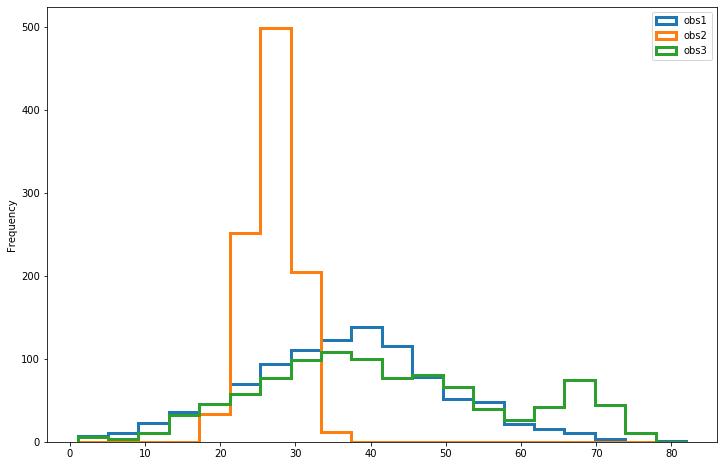

In [56]:
all_data = pd.concat([pop1,pop2,pop3], axis = 1)
all_data.columns=['obs1', 'obs2', 'obs3']

all_data.plot.hist(histtype = 'step', lw= 3, figsize=(12,8), bins = 20)
all_data.describe()

In [ ]:
"""
Neigh 1 and Neigh 3 are very similar, except for an exceptional concentration of people between 62 and 75 yrs of 
age in Negh 3. Apart from that Neigh 3 has a slighlty higher mean and median and also slightly higher stdev, 
probably due to this second formation, but overall similar distribution shape

Neigh 2 is much younger, with a much lesser stdev. Ages range 19-36 with IQR being 25-29 
versus 30-53 and 28-45 for the other two.

On a more social note, N2 is probably a young adults/singles neigh. while 2 and 3 are "family" neigh. with 3 
having a higher concentration of older/retired people.
"""